## Stock Price Prediction (using stacked LSTM ) Project - Aman Kumar

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
key = "156e095f1e5263d34efe4a38a8aaab09f0a2f370"

In [20]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [21]:
df.to_csv('AAPL.csv')

In [23]:
df=pd.read_csv('AAPL.csv')

In [24]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-04-18 00:00:00+00:00,107.48,108.95,106.94,108.89,60821461,24.987674,25.329430,24.862132,25.315481,243285844,0.0,1.0
1,AAPL,2016-04-19 00:00:00+00:00,106.91,108.00,106.23,107.88,32384879,24.855157,25.108568,24.697066,25.080669,129539516,0.0,1.0
2,AAPL,2016-04-20 00:00:00+00:00,107.13,108.09,106.06,106.64,30611030,24.906304,25.129491,24.657543,24.792386,122444120,0.0,1.0
3,AAPL,2016-04-21 00:00:00+00:00,105.97,106.93,105.52,106.93,31552525,24.636619,24.859807,24.532000,24.859807,126210100,0.0,1.0
4,AAPL,2016-04-22 00:00:00+00:00,105.68,106.48,104.62,105.01,33683121,24.569198,24.755188,24.322762,24.413432,134732484,0.0,1.0


In [25]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-04-09 00:00:00+00:00,132.995,133.04,129.470,129.80,106686703,132.995,133.04,129.470,129.80,106686703,0.0,1.0
1254,AAPL,2021-04-12 00:00:00+00:00,131.240,132.85,130.630,132.52,91419983,131.240,132.85,130.630,132.52,91419983,0.0,1.0
1255,AAPL,2021-04-13 00:00:00+00:00,134.430,134.66,131.930,132.44,91266545,134.430,134.66,131.930,132.44,91266545,0.0,1.0
1256,AAPL,2021-04-14 00:00:00+00:00,132.030,135.00,131.655,134.94,87222782,132.030,135.00,131.655,134.94,87222782,0.0,1.0
1257,AAPL,2021-04-15 00:00:00+00:00,134.500,135.00,133.640,133.82,89347102,134.500,135.00,133.640,133.82,89347102,0.0,1.0


In [26]:
df1 = df.reset_index()['close']

In [27]:
df1

0       107.480
1       106.910
2       107.130
3       105.970
4       105.680
         ...   
1253    132.995
1254    131.240
1255    134.430
1256    132.030
1257    134.500
Name: close, Length: 1258, dtype: float64

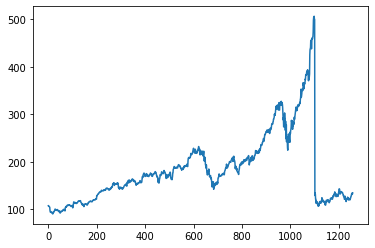

In [28]:
plt.plot(df1)

In [29]:
df1

0       107.480
1       106.910
2       107.130
3       105.970
4       105.680
         ...   
1253    132.995
1254    131.240
1255    134.430
1256    132.030
1257    134.500
Name: close, Length: 1258, dtype: float64

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [31]:
print(df1)

[[0.0412267 ]
 [0.03985568]
 [0.04038485]
 ...
 [0.10604931]
 [0.10027661]
 [0.10621768]]


In [32]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [33]:
training_size,test_size

(817, 441)

In [34]:
train_data

array([[0.0412267 ],
       [0.03985568],
       [0.04038485],
       [0.03759471],
       [0.03689717],
       [0.035454  ],
       [0.03369814],
       [0.01799158],
       [0.01079976],
       [0.00817799],
       [0.00793746],
       [0.01164161],
       [0.00926037],
       [0.00697535],
       [0.00572459],
       [0.00589296],
       [0.0074083 ],
       [0.00521948],
       [0.        ],
       [0.00043295],
       [0.00851473],
       [0.00757667],
       [0.01015033],
       [0.00928443],
       [0.01173782],
       [0.01464823],
       [0.018184  ],
       [0.02232111],
       [0.02422129],
       [0.02407697],
       [0.02289838],
       [0.01953097],
       [0.01775105],
       [0.01823211],
       [0.01993987],
       [0.02090198],
       [0.02068551],
       [0.02239327],
       [0.02042093],
       [0.01683704],
       [0.01712568],
       [0.01635598],
       [0.01734215],
       [0.01200241],
       [0.01144919],
       [0.01339747],
       [0.01253157],
       [0.013

In [35]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [36]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [37]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [38]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [39]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [42]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Train on 716 samples, validate on 340 samples
Epoch 1/100
716/716 [==============================] - 22s 30ms/sample - loss: 0.0097 - val_loss: 0.0581
Epoch 2/100
716/716 [==============================] - 7s 10ms/sample - loss: 0.0026 - val_loss: 0.0298
Epoch 3/100
716/716 [==============================] - 7s 10ms/sample - loss: 0.0013 - val_loss: 0.0269
Epoch 4/100
716/716 [==============================] - 7s 10ms/sample - loss: 6.3190e-04 - val_loss: 0.0217
Epoch 5/100
716/716 [==============================] - 7s 9ms/sample - loss: 4.9353e-04 - val_loss: 0.0213
Epoch 6/100
716/716 [==============================] - 8s 11ms/sample - loss: 4.6577e-04 - val_loss: 0.0203
Epoch 7/100
716/716 [==============================] - 8s 11ms/sample - loss: 4.2847e-04 - val_loss: 0.0195
Epoch 8/100
716/716 [==============================] - 8s 11ms/sample - loss: 4.0768e-04 - val_loss: 0.0188
Epoch 9/100
716/716 [==============================] - 8s 11ms/sample - loss: 3.8718e-04 - val_loss: 0

Epoch 76/100
716/716 [==============================] - 8s 11ms/sample - loss: 1.0303e-04 - val_loss: 0.0070
Epoch 77/100
716/716 [==============================] - 8s 11ms/sample - loss: 1.0120e-04 - val_loss: 0.0070
Epoch 78/100
716/716 [==============================] - 8s 11ms/sample - loss: 1.0459e-04 - val_loss: 0.0066
Epoch 79/100
716/716 [==============================] - 8s 11ms/sample - loss: 1.1093e-04 - val_loss: 0.0074
Epoch 80/100
716/716 [==============================] - 8s 11ms/sample - loss: 9.9798e-05 - val_loss: 0.0071
Epoch 81/100
716/716 [==============================] - 8s 11ms/sample - loss: 1.0282e-04 - val_loss: 0.0067
Epoch 82/100
716/716 [==============================] - 8s 11ms/sample - loss: 1.0437e-04 - val_loss: 0.0076
Epoch 83/100
716/716 [==============================] - 8s 11ms/sample - loss: 9.8701e-05 - val_loss: 0.0067
Epoch 84/100
716/716 [==============================] - 8s 11ms/sample - loss: 1.1364e-04 - val_loss: 0.0082
Epoch 85/100
716/71

In [45]:
import tensorflow as tf

In [46]:
tf.__version__

'2.1.0'

In [47]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [48]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [49]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

166.2061559058077

In [50]:
math.sqrt(mean_squared_error(ytest,test_predict))

262.6951601996895

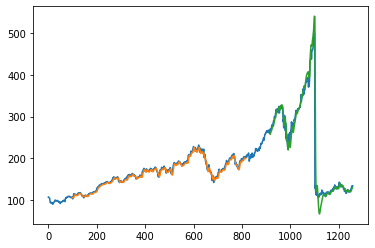

In [53]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [54]:
len(test_data)

441

In [55]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [56]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [57]:
temp_input

[0.06806975345760674,
 0.0649428743235117,
 0.056548406494287384,
 0.05972339146121464,
 0.06179194227300061,
 0.06313890559230306,
 0.06905592303066743,
 0.07788334335538183,
 0.07874924834636199,
 0.07841250751653633,
 0.07675285628382439,
 0.08036079374624172,
 0.08187612748045697,
 0.07562236921226695,
 0.0791340950090198,
 0.07713770294648226,
 0.07562236921226695,
 0.0902946482260974,
 0.0901262778111846,
 0.09226698737221883,
 0.08734816596512324,
 0.0911365003006614,
 0.09991581479254358,
 0.09770294648226097,
 0.10013229104028859,
 0.11148526758869509,
 0.10710763680096214,
 0.1043415514131088,
 0.10186410102224891,
 0.09397474443776305,
 0.0978232110643415,
 0.08721587492483462,
 0.09760673481659649,
 0.10032471437161755,
 0.09294046903187009,
 0.09250751653638006,
 0.09753457606734811,
 0.09277209861695729,
 0.08851473241130486,
 0.09017438364401681,
 0.10027660853878534,
 0.11191822008418523,
 0.11720986169573056,
 0.12647023451593503,
 0.1270475045099218,
 0.12440168370414

In [58]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.09860091]
101
1 day input [0.06494287 0.05654841 0.05972339 0.06179194 0.06313891 0.06905592
 0.07788334 0.07874925 0.07841251 0.07675286 0.08036079 0.08187613
 0.07562237 0.0791341  0.0771377  0.07562237 0.09029465 0.09012628
 0.09226699 0.08734817 0.0911365  0.09991581 0.09770295 0.10013229
 0.11148527 0.10710764 0.10434155 0.1018641  0.09397474 0.09782321
 0.08721587 0.09760673 0.10032471 0.09294047 0.09250752 0.09753458
 0.0927721  0.08851473 0.09017438 0.10027661 0.11191822 0.11720986
 0.12647023 0.1270475  0.12440168 0.11244738 0.10010824 0.10535177
 0.10739627 0.10487072 0.11316897 0.11165364 0.11201443 0.10984967
 0.10835839 0.10773301 0.10831028 0.10306675 0.09741431 0.09469633
 0.09508118 0.0857727  0.08543596 0.08420926 0.07372219 0.07437162
 0.09007817 0.08365604 0.07629585 0.07165364 0.07475646 0.06258569
 0.07395069 0.07129284 0.07605532 0.0738184  0.08093806 0.08473842
 0.08279014 0.07261575 0.0713169  0.07949489 0.07745039 0.07155743
 0.07276007 0.07425135 0.07468431

8 day output [[0.08660715]]
9 day input [0.07841251 0.07675286 0.08036079 0.08187613 0.07562237 0.0791341
 0.0771377  0.07562237 0.09029465 0.09012628 0.09226699 0.08734817
 0.0911365  0.09991581 0.09770295 0.10013229 0.11148527 0.10710764
 0.10434155 0.1018641  0.09397474 0.09782321 0.08721587 0.09760673
 0.10032471 0.09294047 0.09250752 0.09753458 0.0927721  0.08851473
 0.09017438 0.10027661 0.11191822 0.11720986 0.12647023 0.1270475
 0.12440168 0.11244738 0.10010824 0.10535177 0.10739627 0.10487072
 0.11316897 0.11165364 0.11201443 0.10984967 0.10835839 0.10773301
 0.10831028 0.10306675 0.09741431 0.09469633 0.09508118 0.0857727
 0.08543596 0.08420926 0.07372219 0.07437162 0.09007817 0.08365604
 0.07629585 0.07165364 0.07475646 0.06258569 0.07395069 0.07129284
 0.07605532 0.0738184  0.08093806 0.08473842 0.08279014 0.07261575
 0.0713169  0.07949489 0.07745039 0.07155743 0.07276007 0.07425135
 0.07468431 0.07110042 0.07651233 0.07855683 0.08553217 0.08627781
 0.09034275 0.09625977 0.

16 day output [[0.08213375]]
17 day input [0.09029465 0.09012628 0.09226699 0.08734817 0.0911365  0.09991581
 0.09770295 0.10013229 0.11148527 0.10710764 0.10434155 0.1018641
 0.09397474 0.09782321 0.08721587 0.09760673 0.10032471 0.09294047
 0.09250752 0.09753458 0.0927721  0.08851473 0.09017438 0.10027661
 0.11191822 0.11720986 0.12647023 0.1270475  0.12440168 0.11244738
 0.10010824 0.10535177 0.10739627 0.10487072 0.11316897 0.11165364
 0.11201443 0.10984967 0.10835839 0.10773301 0.10831028 0.10306675
 0.09741431 0.09469633 0.09508118 0.0857727  0.08543596 0.08420926
 0.07372219 0.07437162 0.09007817 0.08365604 0.07629585 0.07165364
 0.07475646 0.06258569 0.07395069 0.07129284 0.07605532 0.0738184
 0.08093806 0.08473842 0.08279014 0.07261575 0.0713169  0.07949489
 0.07745039 0.07155743 0.07276007 0.07425135 0.07468431 0.07110042
 0.07651233 0.07855683 0.08553217 0.08627781 0.09034275 0.09625977
 0.10259771 0.09837643 0.10604931 0.10027661 0.10621768 0.09860091
 0.09836618 0.09706496

26 day output [[0.07817008]]
27 day input [0.10434155 0.1018641  0.09397474 0.09782321 0.08721587 0.09760673
 0.10032471 0.09294047 0.09250752 0.09753458 0.0927721  0.08851473
 0.09017438 0.10027661 0.11191822 0.11720986 0.12647023 0.1270475
 0.12440168 0.11244738 0.10010824 0.10535177 0.10739627 0.10487072
 0.11316897 0.11165364 0.11201443 0.10984967 0.10835839 0.10773301
 0.10831028 0.10306675 0.09741431 0.09469633 0.09508118 0.0857727
 0.08543596 0.08420926 0.07372219 0.07437162 0.09007817 0.08365604
 0.07629585 0.07165364 0.07475646 0.06258569 0.07395069 0.07129284
 0.07605532 0.0738184  0.08093806 0.08473842 0.08279014 0.07261575
 0.0713169  0.07949489 0.07745039 0.07155743 0.07276007 0.07425135
 0.07468431 0.07110042 0.07651233 0.07855683 0.08553217 0.08627781
 0.09034275 0.09625977 0.10259771 0.09837643 0.10604931 0.10027661
 0.10621768 0.09860091 0.09836618 0.09706496 0.09519126 0.09314952
 0.09118614 0.08941998 0.08789275 0.08660715 0.08554818 0.08469242
 0.08401171 0.0834749 

In [59]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [60]:
len(df1)

1258

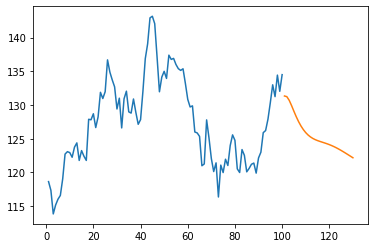

In [61]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

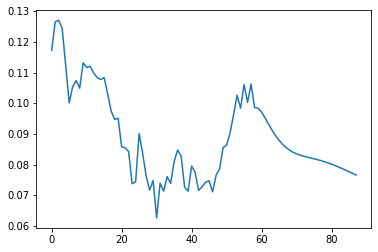

In [62]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [63]:
df3=scaler.inverse_transform(df3).tolist()

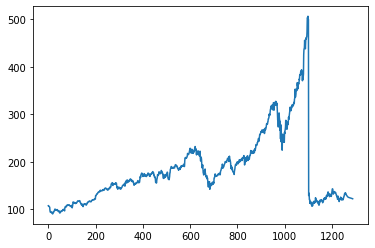

In [64]:
plt.plot(df3)